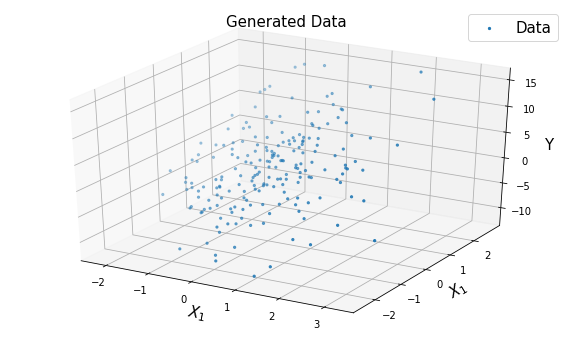

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
%matplotlib inline

#for 3D plot
# from mpl_tookits.mplot3d import Axes3D -> on Mac, Linux 
import importlib
importlib.import_module('mpl_toolkits.mplot3d').Axes3D

# y = theta1*x1 + theta2*x2 + theta3 + noise

n = 200
x1 = np.random.randn(n, 1) # column matrix

x2 = np.random.randn(n, 1)
noise = 0.5*np.random.randn(n, 1);

y = 1*x1 + 3*x2 + 2*x2 + noise

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title('Generated Data', fontsize=15)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_1$', fontsize=15)
ax.set_zlabel('Y', fontsize=15)
ax.scatter(x1, x2, y, marker='.', label='Data')
#ax.view_init(30,30)
plt.legend(fontsize=15)
plt.show()

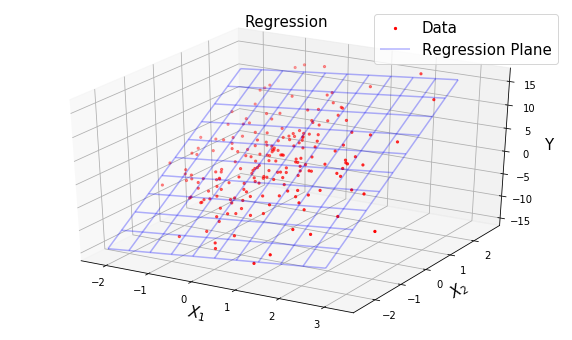

theta:
 [[ 9.37645162e-01]
 [ 5.09051550e+00]
 [-3.74212951e-04]]


In [64]:
#% matplotlib qt5

A = np.hstack([x1, x2, np.ones((n, 1))])
A = np.asmatrix(A)
theta = (A.T*A).I*A.T*y

# plane
X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1), 0.5),
                     np.arange(np.min(x2), np.max(x2), 0.5))
YP = theta[0,0]*X1 + theta[1,0]*X2 + theta[2,0]  

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title('Regression', fontsize=15)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('Y', fontsize=15)
ax.scatter(x1, x2, y, marker='.', color='r', label='Data')
ax.plot_wireframe(X1, X2, YP, color='b', alpha=0.3, label='Regression Plane')
#ax.view_init(30,30)
plt.legend(fontsize=15)
plt.show()

print('theta:\n', theta)